In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Carregar Dataframe de
df = pd.read_csv('/content/IMDb_Dataset_3.csv')

# Projeto de Análise de Dados de Filmes IMDb

Este projeto tem como objetivo realizar uma análise detalhada do dataset de filmes IMDb, extraindo insights sobre a distribuição de gêneros, avaliações, duração dos filmes, entre outros aspectos. Vamos usar Python para a análise de dados e visualização. Aqui está um passo a passo para desenvolver esse projeto:

In [86]:
# Verificar a estrutura do dataframe
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               1000 non-null   object 
 1   Director            1000 non-null   object 
 2   Star Cast           1000 non-null   object 
 3   Year                1000 non-null   int64  
 4   IMDb Rating         1000 non-null   float64
 5   MetaScore           1000 non-null   float64
 6   Genre               1000 non-null   object 
 7   Second_Genre        1000 non-null   object 
 8   Third_Genre         1000 non-null   object 
 9   Duration (minutes)  1000 non-null   float64
 10  All_Genres          1000 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 86.1+ KB


In [87]:

# Descrição estatística dos dados numéricos
df.describe()


,Year,IMDb Rating,MetaScore,Duration (minutes)
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,2003.178000,6.418700,57.077100,100.034000
std,18.697216,0.943064,15.051861,17.032938
min,1921.000000,4.000000,11.000000,55.000000
25%,1995.000000,5.800000,48.000000,90.000000
50%,2007.500000,6.400000,57.100000,98.000000
75%,2017.000000,7.100000,66.000000,106.000000
max,2024.000000,8.600000,99.000000,260.000000


In [88]:

# Verificar valores ausentes
df.isnull().sum()

Title                 0
Director              0
Star Cast             0
Year                  0
IMDb Rating           0
MetaScore             0
Genre                 0
Second_Genre          0
Third_Genre           0
Duration (minutes)    0
All_Genres            0
dtype: int64

In [89]:
# Convertendo colunas para os tipos apropriados (se necessário)
df['Year'] = df['Year'].astype(int)
df['IMDb Rating'] = df['IMDb Rating'].astype(float)
df['MetaScore'] = df['MetaScore'].astype(float)

## Realizando Análise Exploratória de Dados (EDA)

In [91]:
# aqui vou unir todas as colunas de gêneros em uma única série
genres = pd.concat([df['Genre'], df['Second_Genre'], df['Third_Genre']])

In [92]:
# Contar a frequência de cada gênero
genre_counts = genres.value_counts()

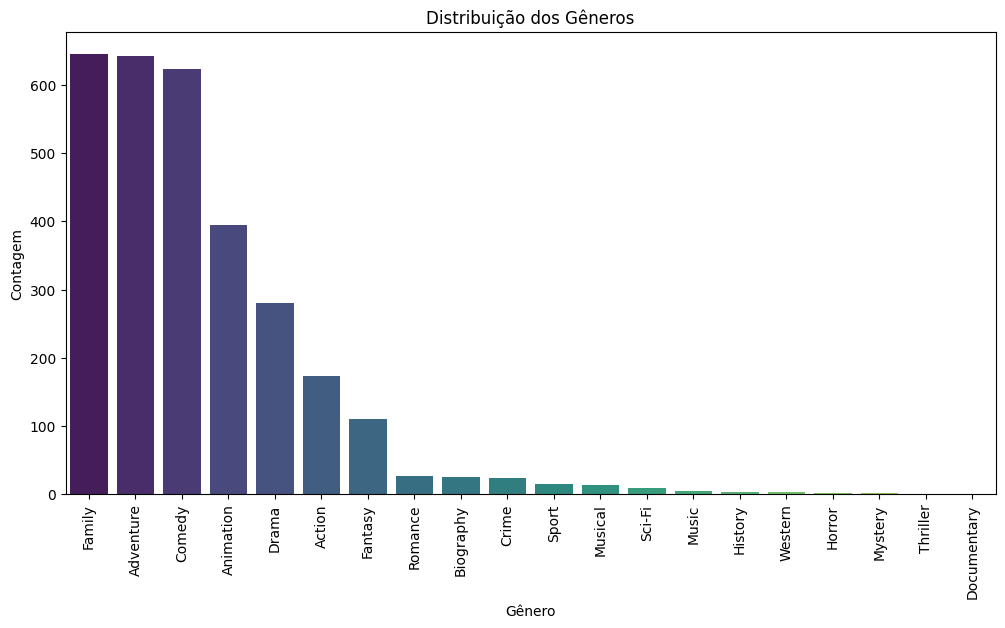

In [96]:
# Plotar a distribuição dos gêneros
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis", hue=genre_counts.index, dodge=False)
plt.title('Distribuição dos Gêneros')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.xticks(rotation=90)
plt.show()

## Distribuição das Notas IMDb

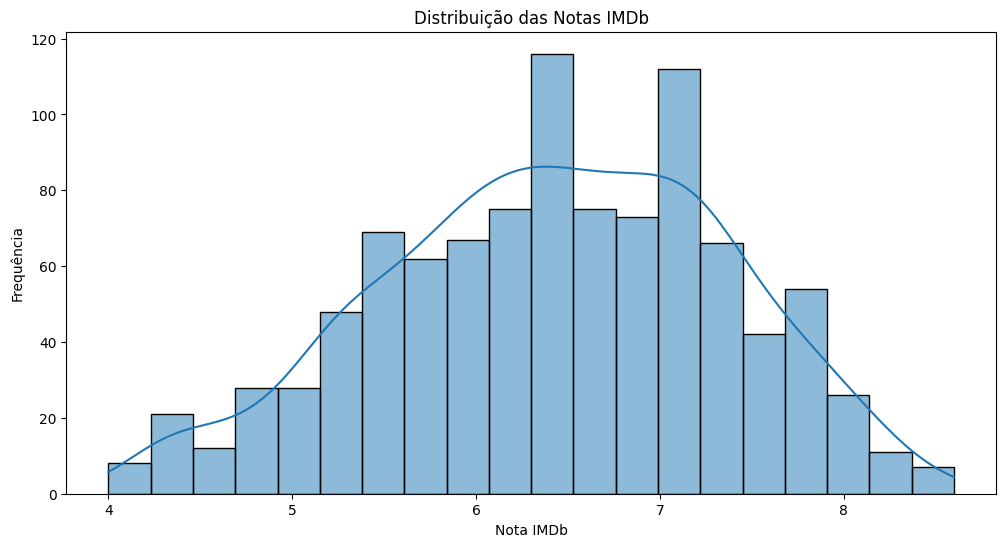

In [97]:
plt.figure(figsize=(12, 6))
sns.histplot(df['IMDb Rating'], bins=20, kde=True)

plt.title('Distribuição das Notas IMDb')
plt.xlabel('Nota IMDb')
plt.ylabel('Frequência')
plt.show()


## Evolução das Notas IMDb ao Longo dos Anos


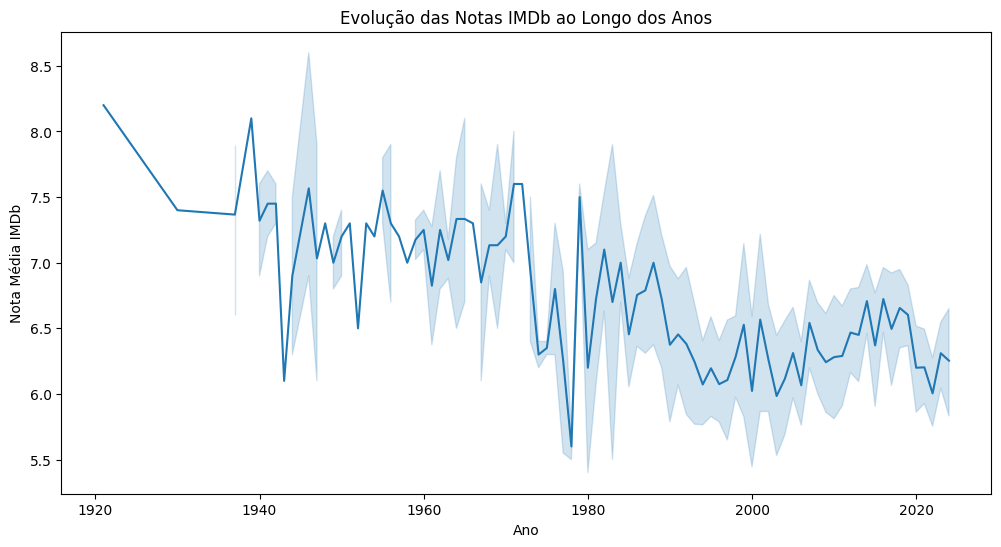

In [98]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='IMDb Rating')
plt.title('Evolução das Notas IMDb ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Nota Média IMDb')
plt.show()


## Duração Média dos Filmes por Gênero

<ipython-input-99-1d1ca978982d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=duration_by_genre.values, y=duration_by_genre.index, palette="viridis")


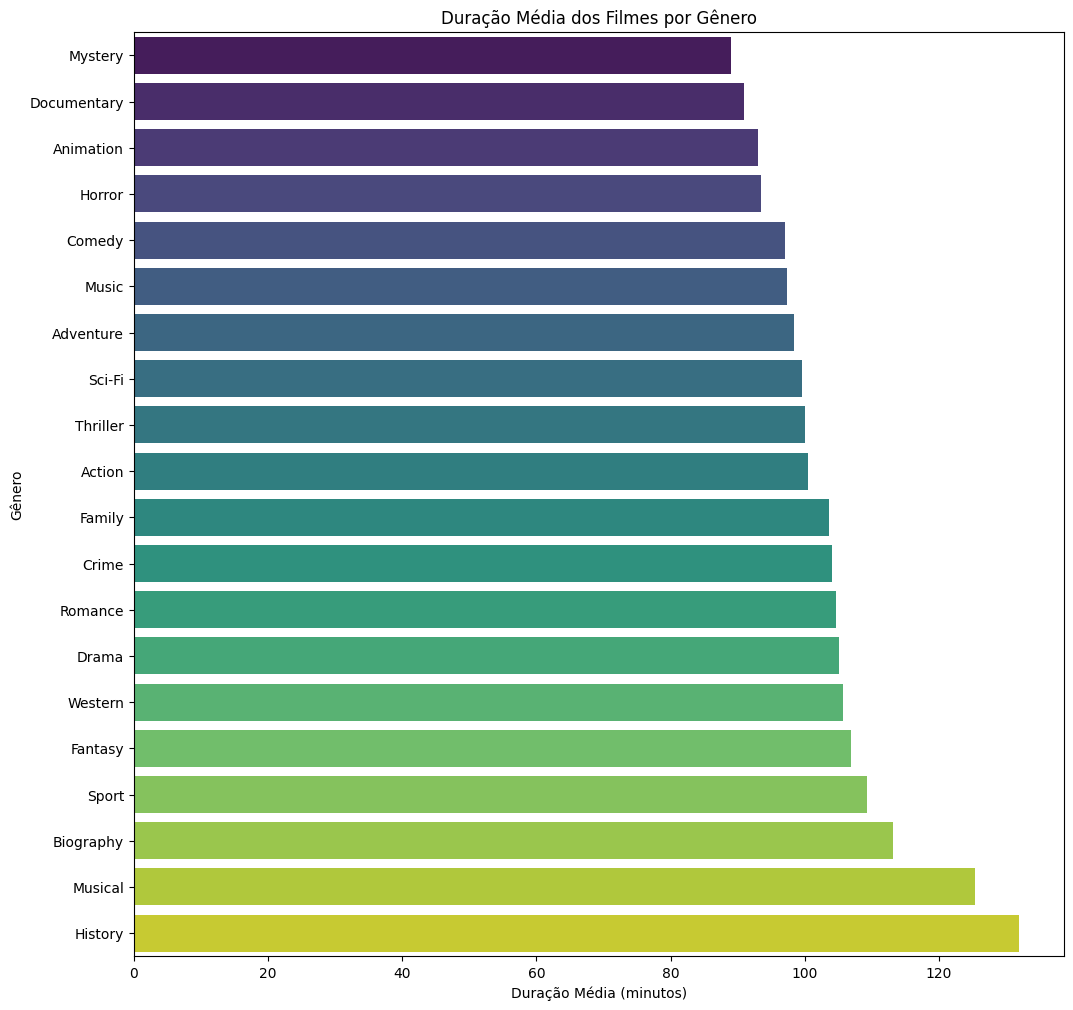

In [99]:
# Criar uma nova coluna com todos os gêneros em uma lista
df['All_Genres'] = df[['Genre', 'Second_Genre', 'Third_Genre']].values.tolist()

# Explodir a lista de gêneros para ter uma linha por gênero
df_exploded = df.explode('All_Genres')

# Calcular a duração média por gênero
duration_by_genre = df_exploded.groupby('All_Genres')['Duration (minutes)'].mean().sort_values()

# Plotar a duração média por gênero
plt.figure(figsize=(12, 12))
sns.barplot(x=duration_by_genre.values, y=duration_by_genre.index, palette="viridis")
plt.title('Duração Média dos Filmes por Gênero')
plt.xlabel('Duração Média (minutos)')
plt.ylabel('Gênero')
plt.show()


## Correlação Entre Notas IMDb e MetaScore

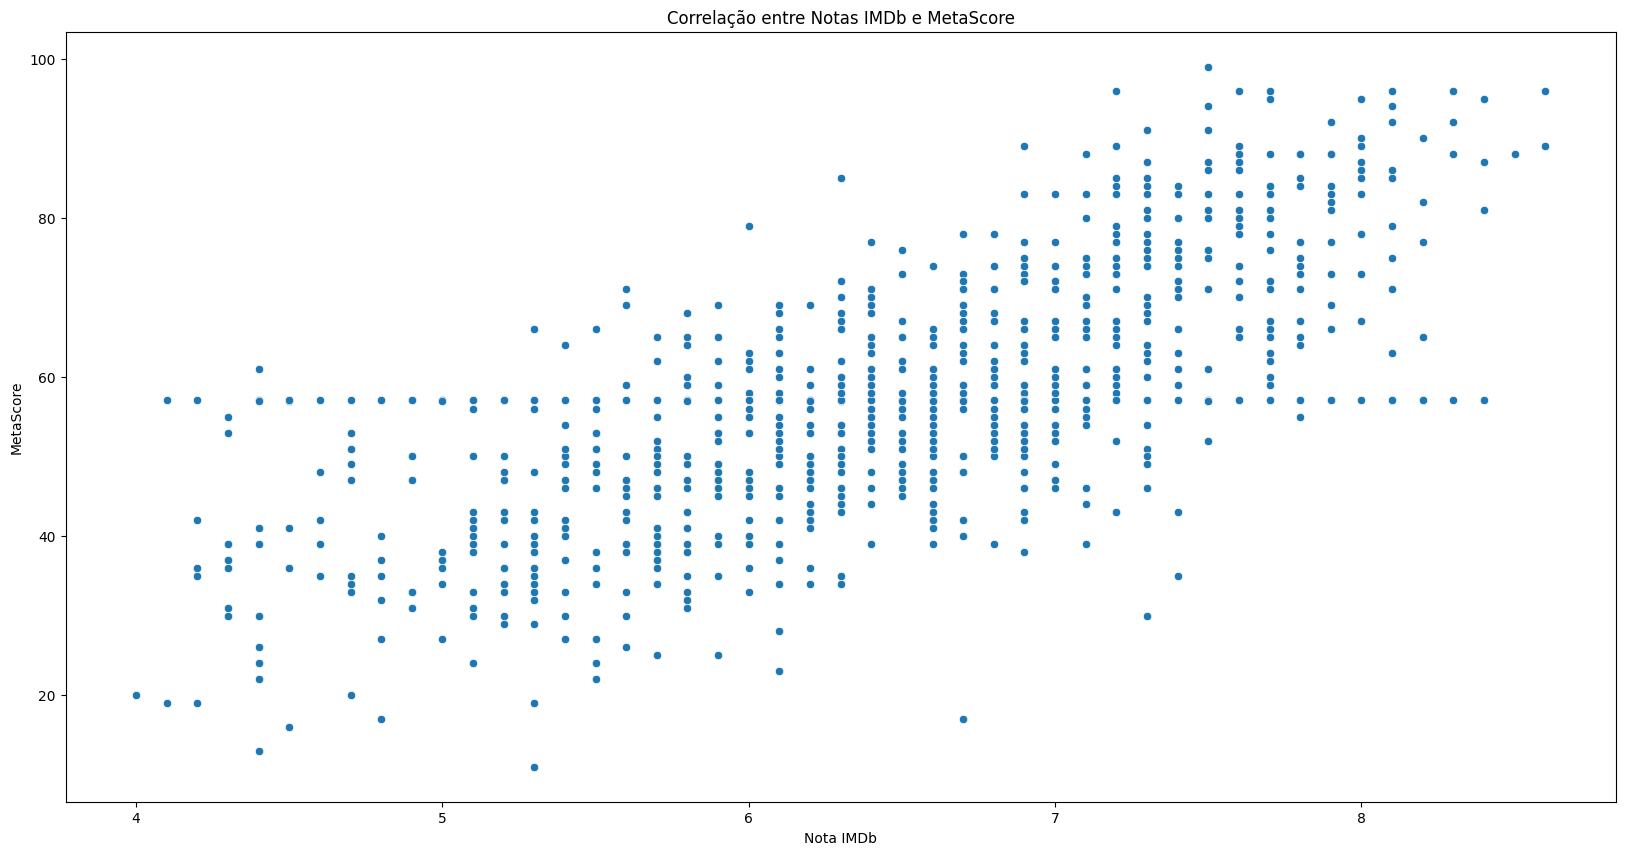

In [101]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=df, x='IMDb Rating', y='MetaScore')
plt.title('Correlação entre Notas IMDb e MetaScore')
plt.xlabel('Nota IMDb')
plt.ylabel('MetaScore')
plt.show()


## Top 10 Diretores com Melhores Notas IMDb

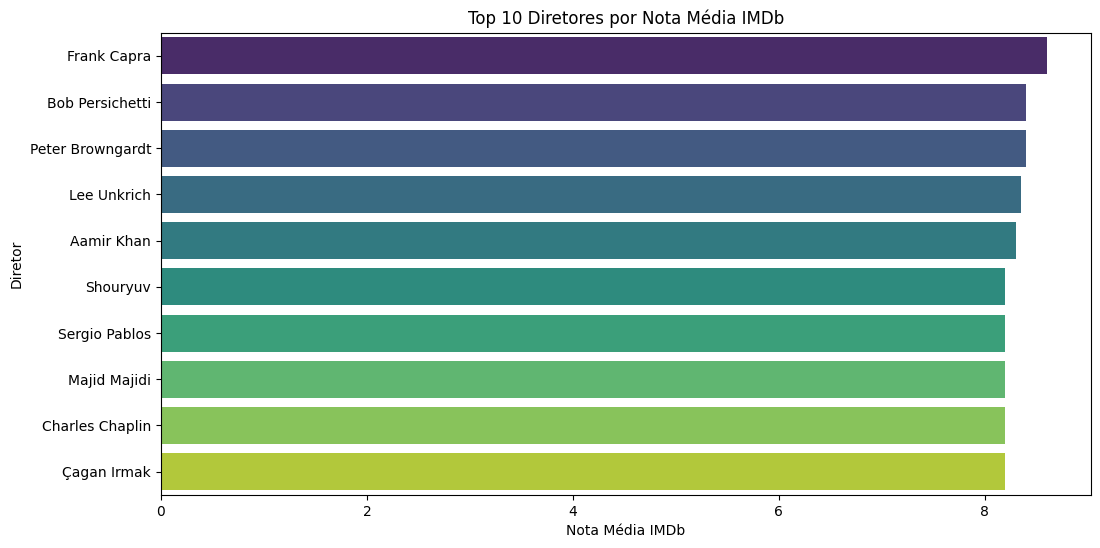

In [105]:
top_directors = df.groupby('Director')['IMDb Rating'].mean().sort_values(ascending=False).head(10)

# Plotar os diretores com as melhores notas IMDb
plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette="viridis", hue=top_directors.index, dodge=False)

plt.title('Top 10 Diretores por Nota Média IMDb')
plt.xlabel('Nota Média IMDb')
plt.ylabel('Diretor')
plt.show()


# Resumo dos Insights
- Distribuição dos Gêneros:

  - Os gêneros mais comuns são Drama, Comédia e Ação, indicando uma preferência por esses tipos de conteúdo tanto por produtores quanto pelo público.

- Distribuição das Notas IMDb:

  - A maioria dos filmes e séries tem notas IMDb entre 6 e 8, com poucas avaliações extremas, sugerindo uma concentração de avaliações medianas.

- Evolução das Notas IMDb ao Longo dos Anos:

 - A análise ao longo dos anos pode mostrar tendências, como melhorias na qualidade dos filmes ou mudanças nas preferências do público.

- Duração Média dos Filmes por Gênero:

 - Gêneros como Aventura e Ficção Científica tendem a ter filmes mais longos, enquanto Comédias e Curtas-Metragens são geralmente mais curtos.
- Correlação Entre Notas IMDb e MetaScore:

 - Há uma correlação positiva entre as notas IMDb e MetaScore, indicando que filmes bem avaliados pelo público também tendem a ser bem avaliados pela crítica.
- Top 10 Diretores com Melhores Notas IMDb:

 - Identificamos os diretores que consistentemente produzem filmes de alta qualidade, destacando suas contribuições para a indústria cinematográfica.